# Chicago AirBNB Prediction

# Data set Description:
This dataset provides detailed information about Airbnb listings in Chicago, including the host, price, and availability of each listing. This dataset can be used to determine how much each list costs and when it is available to rent. It can also provide insight into which hosts are offering the most competitive prices and what type of accommodations they offer.

# Columns Information:

| **Variable Name** | **Description** |
|:--:|:--|
|id | The id of the airbnb|
|name | The name of the airbnb|
|host_id | The id of the host|
|host_name | The name of the host|
|neighborhood | Which area is the airbnb belongs to|
|latitude | The latitude of the position|
|longitude | The longitude of the position|
|room_type | Entire home/apt, Private room or Other|
|price | The price of the apartment(per day)|
|minimum_nights | The least nights you need to book|
|number_of_reviews | The total number of the reviews on this dataset|
|last_review | The last review time|
|reviews_per_month | How many reviews the airbnb can receive per month|
|calculated_host_listings_count | The total listing number of the host|
|availability_365 | The available days|
|license| License num of particular airbnb|

In [1]:
# Importing Required libraries
import io
import os
import numpy as np # linear algebra
import pandas as pd # Files I/O
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%cd "D:\Imarticus\stat\Chicago airbnb"

D:\Imarticus\stat\Chicago airbnb


In [3]:
chicagobnb=pd.read_csv('listings.csv') # Importing the listings data of chicago airbnb

In [4]:
chicagobnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2384,Condo in Chicago · ★4.99 · 1 bedroom · 1 bed ·...,2613,Rebecca,NaN,Hyde Park,41.787900,-87.587800,Private room,129,3,220,2023-06-10,2.14,1,350,19,NaN
1,7126,Rental unit in Chicago · ★4.70 · 1 bedroom · 1...,17928,Sarah,NaN,West Town,41.901660,-87.680210,Entire home/apt,94,32,493,2023-05-28,2.90,1,295,44,R21000075737
2,2907500,Home in Chicago · ★4.84 · 1 bedroom · 1 bed · ...,11231030,Erik,NaN,West Lawn,41.782250,-87.728060,Private room,39,1,335,2023-05-31,3.11,2,196,6,NaN
3,755701,Rental unit in Chicago · ★4.73 · 3 bedrooms · ...,3920450,Vas,NaN,Logan Square,41.931150,-87.718360,Entire home/apt,100,32,27,2022-12-01,0.22,4,198,3,City registration pending
4,10945,Rental unit in Chicago · ★4.64 · 2 bedrooms · ...,33004,At Home Inn,NaN,Lincoln Park,41.911960,-87.639810,Entire home/apt,219,4,66,2023-06-07,0.59,7,94,19,2209984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8019,913626355026820271,Rental unit in Chicago · ★New · 1 bedroom · 1 ...,518917937,Belle,NaN,Edgewater,41.987116,-87.663194,Private room,75,1,0,NaN,NaN,23,355,0,2845517
8020,913638806912452641,Rental unit in Chicago · ★New · 1 bedroom · 1 ...,518917937,Belle,NaN,Uptown,41.954764,-87.651852,Entire home/apt,132,1,0,NaN,NaN,23,363,0,2845517
8021,913680038957326474,Rental unit in Chicago · ★New · Studio · 1 bed...,518917937,Belle,NaN,Uptown,41.957153,-87.651080,Entire home/apt,121,1,0,NaN,NaN,23,359,0,2845517
8022,913749252939177162,Rental unit in Chicago · ★New · Studio · 1 bed...,2010015,Martin,NaN,Avondale,41.934530,-87.720143,Entire home/apt,129,32,0,NaN,NaN,6,362,0,NaN


In [5]:
chicagobnb.shape

(8024, 18)

In [6]:
chicagobnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2384,Condo in Chicago · ★4.99 · 1 bedroom · 1 bed ·...,2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,129,3,220,2023-06-10,2.14,1,350,19,NaN
1,7126,Rental unit in Chicago · ★4.70 · 1 bedroom · 1...,17928,Sarah,NaN,West Town,41.90166,-87.68021,Entire home/apt,94,32,493,2023-05-28,2.90,1,295,44,R21000075737
2,2907500,Home in Chicago · ★4.84 · 1 bedroom · 1 bed · ...,11231030,Erik,NaN,West Lawn,41.78225,-87.72806,Private room,39,1,335,2023-05-31,3.11,2,196,6,NaN
3,755701,Rental unit in Chicago · ★4.73 · 3 bedrooms · ...,3920450,Vas,NaN,Logan Square,41.93115,-87.71836,Entire home/apt,100,32,27,2022-12-01,0.22,4,198,3,City registration pending
4,10945,Rental unit in Chicago · ★4.64 · 2 bedrooms · ...,33004,At Home Inn,NaN,Lincoln Park,41.91196,-87.63981,Entire home/apt,219,4,66,2023-06-07,0.59,7,94,19,2209984


In [7]:
chicagobnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
8019,913626355026820271,Rental unit in Chicago · ★New · 1 bedroom · 1 ...,518917937,Belle,NaN,Edgewater,41.987116,-87.663194,Private room,75,1,0,NaN,NaN,23,355,0,2845517
8020,913638806912452641,Rental unit in Chicago · ★New · 1 bedroom · 1 ...,518917937,Belle,NaN,Uptown,41.954764,-87.651852,Entire home/apt,132,1,0,NaN,NaN,23,363,0,2845517
8021,913680038957326474,Rental unit in Chicago · ★New · Studio · 1 bed...,518917937,Belle,NaN,Uptown,41.957153,-87.651080,Entire home/apt,121,1,0,NaN,NaN,23,359,0,2845517
8022,913749252939177162,Rental unit in Chicago · ★New · Studio · 1 bed...,2010015,Martin,NaN,Avondale,41.934530,-87.720143,Entire home/apt,129,32,0,NaN,NaN,6,362,0,NaN
8023,913751380565585633,Rental unit in Chicago · ★New · 3 bedrooms · 3...,141909027,Jay,NaN,Near West Side,41.881518,-87.679962,Entire home/apt,127,1,0,NaN,NaN,2,39,0,R23000103323


In [8]:
chicagobnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [9]:
chicagobnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [10]:
chicagobnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8024 entries, 0 to 8023
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8024 non-null   int64  
 1   name                            8024 non-null   object 
 2   host_id                         8024 non-null   int64  
 3   host_name                       8024 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   8024 non-null   object 
 6   latitude                        8024 non-null   float64
 7   longitude                       8024 non-null   float64
 8   room_type                       8024 non-null   object 
 9   price                           8024 non-null   int64  
 10  minimum_nights                  8024 non-null   int64  
 11  number_of_reviews               8024 non-null   int64  
 12  last_review                     64

# Exploratory Data Analysis(EDA)
## Missing Values Imputation

In [11]:
# checking Null values in the dataframe
chicagobnb.isnull().sum().sort_values(ascending=False)

neighbourhood_group               8024
license                           2471
reviews_per_month                 1564
last_review                       1564
minimum_nights                       0
number_of_reviews_ltm                0
availability_365                     0
calculated_host_listings_count       0
number_of_reviews                    0
id                                   0
name                                 0
room_type                            0
longitude                            0
latitude                             0
neighbourhood                        0
host_name                            0
host_id                              0
price                                0
dtype: int64

In [12]:
chicagobnb=chicagobnb.drop('neighbourhood_group',axis=1)

In [13]:
chicagobnb.license.value_counts(dropna=False)

NaN                          2471
City registration pending     432
32+ Days Listing              157
2792126                       129
32+days Listing                68
                             ... 
R19000050325                    1
R20000051707                    1
R19000049539                    1
R19000046426                    1
R23000103323                    1
Name: license, Length: 3655, dtype: int64

In [14]:
chicagobnb.license=chicagobnb.license.ffill()

In [15]:
chicagobnb.license.value_counts(dropna=False)

City registration pending    605
32+ Days Listing             201
2792126                      198
32+days Listing               90
2863615                       43
                            ... 
R23000097078                   1
R21000073739                   1
R22000077564                   1
R20000051706                   1
R23000103323                   1
Name: license, Length: 3655, dtype: int64

In [16]:
chicagobnb.license=chicagobnb.license.fillna('City registration pending')

In [17]:
chicagobnb.reviews_per_month=chicagobnb.reviews_per_month.fillna(chicagobnb.reviews_per_month.mean())

In [18]:
chicagobnb.last_review.value_counts(dropna=False)

NaN           1564
2023-06-11     641
2023-06-04     359
2023-06-12     333
2023-05-29     309
              ... 
2020-02-21       1
2019-08-29       1
2021-10-31       1
2017-09-19       1
2023-03-18       1
Name: last_review, Length: 906, dtype: int64

In [19]:
chicagobnb.last_review=pd.to_datetime(chicagobnb.last_review)

In [20]:
chicagobnb.last_review.value_counts(dropna=False)

NaT           1564
2023-06-11     641
2023-06-04     359
2023-06-12     333
2023-05-29     309
              ... 
2020-02-21       1
2019-08-29       1
2021-10-31       1
2017-09-19       1
2023-03-18       1
Name: last_review, Length: 906, dtype: int64

In [21]:
chicagobnb.last_review=chicagobnb.last_review.ffill()

In [22]:
chicagobnb.last_review=chicagobnb.last_review.fillna('2023-06-11')

In [23]:
chicagobnb.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
dtype: int64

In [24]:
chicagobnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,8.024000e+03,8.024000e+03,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000
mean,3.135320e+17,1.679340e+08,41.894243,-87.662688,214.153290,15.600823,46.117896,1.878774,61.574526,201.967971,13.419990
std,3.734884e+17,1.585120e+08,0.061762,0.043762,290.968254,42.986730,87.624549,1.678452,177.424596,125.235404,21.271301
min,2.384000e+03,2.153000e+03,41.646767,-87.847243,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3.366225e+07,3.327857e+07,41.867065,-87.686212,93.000000,2.000000,1.000000,0.760000,1.000000,89.000000,0.000000
50%,5.121381e+07,1.074344e+08,41.897425,-87.657943,150.000000,2.000000,14.000000,1.878774,3.000000,221.000000,5.000000
75%,7.145524e+17,2.679861e+08,41.937238,-87.631716,240.000000,32.000000,53.000000,2.430000,16.000000,319.000000,22.000000
max,9.154715e+17,5.203376e+08,42.022200,-87.529541,10000.000000,1125.000000,3194.000000,57.140000,655.000000,365.000000,885.000000


In [25]:
chicagobnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

In [26]:
chicagobnb.name.value_counts()

Rental unit in Chicago · 1 bedroom · 1 bed · 1 bath               513
Rental unit in Chicago · Studio · 1 bed · 1 bath                  150
Rental unit in Chicago · 2 bedrooms · 2 beds · 2 baths            124
Rental unit in Chicago · 1 bedroom · 1 bed · 1 shared bath        104
Rental unit in Chicago · ★New · 1 bedroom · 1 bed · 1 bath        102
                                                                 ... 
Rental unit in Chicago · ★4.15 · 3 bedrooms · 4 beds · 1 bath       1
Home in Chicago · ★4.84 · 5 bedrooms · 13 beds · 3.5 baths          1
Rental unit in Chicago · ★4.98 · 5 bedrooms · 9 beds · 2 baths      1
Condo in Chicago · ★4.65 · 1 bedroom · 1 shared bath                1
Rental unit in Chicago · ★New · 3 bedrooms · 10 beds · 2 baths      1
Name: name, Length: 3503, dtype: int64

In [27]:
chicagobnb.host_name.value_counts()

Blueground        655
Rob                80
Joe                73
Milan              70
David              66
                 ... 
Marzena             1
Yas                 1
Hillary             1
Demos               1
Harpreet Singh      1
Name: host_name, Length: 2045, dtype: int64

In [28]:
chicagobnb.neighbourhood.value_counts()

Near North Side    960
West Town          800
Lake View          610
Near West Side     513
Logan Square       452
                  ... 
Edison Park          2
Avalon Park          2
Mount Greenwood      2
Burnside             1
Riverdale            1
Name: neighbourhood, Length: 77, dtype: int64

In [29]:
chicagobnb.room_type.value_counts()

Entire home/apt    6201
Private room       1691
Shared room          84
Hotel room           48
Name: room_type, dtype: int64

In [30]:
chicagobnb.minimum_nights.value_counts()

32      2574
2       2404
1       1735
3        687
4        112
5         79
7         56
30        50
60        38
33        30
28        27
14        25
6         24
10        23
90        23
120       14
365       13
180       12
20        10
1125       7
31         7
35         6
40         5
75         5
25         4
21         4
15         4
160        3
70         3
12         3
50         3
360        3
100        2
500        2
24         2
8          2
140        2
200        2
9          2
29         2
89         1
240        1
300        1
27         1
103        1
1000       1
182        1
18         1
179        1
26         1
119        1
39         1
150        1
168        1
132        1
Name: minimum_nights, dtype: int64

In [31]:
chicagobnb.calculated_host_listings_count.value_counts()

1      2723
2       938
655     655
3       519
4       304
6       288
5       240
7       196
8       184
23      161
10      140
9       135
16      128
39      117
19       95
29       87
17       85
74       74
24       72
70       70
33       66
13       65
15       60
12       60
14       56
11       55
18       54
51       51
46       46
22       44
40       40
38       38
35       35
34       34
30       30
28       28
26       26
25       25
Name: calculated_host_listings_count, dtype: int64

In [32]:
chicagobnb.availability_365.value_counts()

0      777
365    266
322     77
364     68
307     68
      ... 
194      5
17       4
226      4
241      3
245      1
Name: availability_365, Length: 366, dtype: int64

In [33]:
chicagobnb.license.value_counts()

City registration pending    606
32+ Days Listing             201
2792126                      198
32+days Listing               90
R19000046222                  43
                            ... 
R19000042276                   1
R22000083748                   1
R21000070860                   1
R23000101714                   1
R23000103323                   1
Name: license, Length: 3654, dtype: int64

## Data Visualization

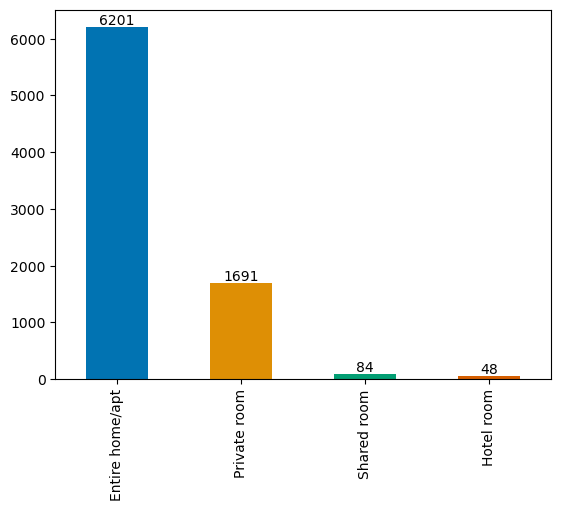

In [34]:
ax=chicagobnb.room_type.value_counts().plot(kind='bar',color=sns.color_palette('colorblind'))
for i in ax.containers:
    ax.bar_label(i)

In [35]:
pd.cut(chicagobnb.price,bins=40).value_counts()#bins means class intervals
#cut is a function name that is used for frequency

(-10.0, 250.0]       6223
(250.0, 500.0]       1282
(500.0, 750.0]        283
(750.0, 1000.0]        99
(1000.0, 1250.0]       60
(1250.0, 1500.0]       21
(1500.0, 1750.0]       18
(1750.0, 2000.0]        8
(2000.0, 2250.0]        6
(2250.0, 2500.0]        5
(2500.0, 2750.0]        4
(2750.0, 3000.0]        3
(3000.0, 3250.0]        2
(3250.0, 3500.0]        2
(3500.0, 3750.0]        2
(4250.0, 4500.0]        2
(5500.0, 5750.0]        1
(4750.0, 5000.0]        1
(5000.0, 5250.0]        1
(9750.0, 10000.0]       1
(7500.0, 7750.0]        0
(9500.0, 9750.0]        0
(9250.0, 9500.0]        0
(9000.0, 9250.0]        0
(8750.0, 9000.0]        0
(8500.0, 8750.0]        0
(8250.0, 8500.0]        0
(8000.0, 8250.0]        0
(7750.0, 8000.0]        0
(4500.0, 4750.0]        0
(4000.0, 4250.0]        0
(7000.0, 7250.0]        0
(6750.0, 7000.0]        0
(6500.0, 6750.0]        0
(6250.0, 6500.0]        0
(6000.0, 6250.0]        0
(5750.0, 6000.0]        0
(3750.0, 4000.0]        0
(5250.0, 550

In [36]:
pd.cut(chicagobnb.price,bins=[0,50,100,150,200,250,300,350,400,450,500,1000,10000]).value_counts()

(100, 150]       1705
(50, 100]        1697
(150, 200]       1281
(200, 250]        869
(0, 50]           669
(250, 300]        530
(500, 1000]       382
(300, 350]        322
(350, 400]        210
(1000, 10000]     137
(400, 450]        127
(450, 500]         93
Name: price, dtype: int64

In [37]:
pd.cut(chicagobnb.price,bins=[0,50,100,150,200,250,300,350,400,450,500,1000,10000]).value_counts().sort_index()

(0, 50]           669
(50, 100]        1697
(100, 150]       1705
(150, 200]       1281
(200, 250]        869
(250, 300]        530
(300, 350]        322
(350, 400]        210
(400, 450]        127
(450, 500]         93
(500, 1000]       382
(1000, 10000]     137
Name: price, dtype: int64

In [38]:
pd.cut(chicagobnb.number_of_reviews,bins=[0,50,100,150,200,250,300,350,400,450,500,1000,10000]).value_counts().sort_index()

(0, 50]          4384
(50, 100]         966
(100, 150]        424
(150, 200]        269
(200, 250]        165
(250, 300]         90
(300, 350]         62
(350, 400]         27
(400, 450]         26
(450, 500]         19
(500, 1000]        26
(1000, 10000]       2
Name: number_of_reviews, dtype: int64

In [39]:
pd.cut(chicagobnb.number_of_reviews,bins=[0,50,100,150,200,250,300,350,400,450,500,1000,10000]).value_counts().sort_values()

(1000, 10000]       2
(450, 500]         19
(400, 450]         26
(500, 1000]        26
(350, 400]         27
(300, 350]         62
(250, 300]         90
(200, 250]        165
(150, 200]        269
(100, 150]        424
(50, 100]         966
(0, 50]          4384
Name: number_of_reviews, dtype: int64

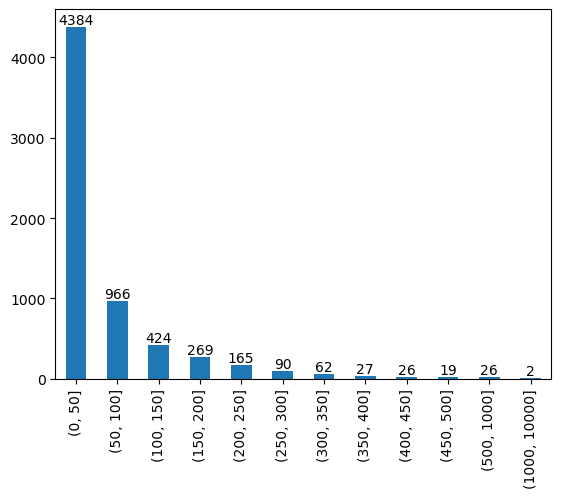

In [40]:
bx=pd.cut(chicagobnb.number_of_reviews,bins=[0,50,100,150,200,250,300,350,400,450,500,1000,10000]).value_counts().sort_index().plot(kind='bar')
for i in bx.containers:
  bx.bar_label(i)

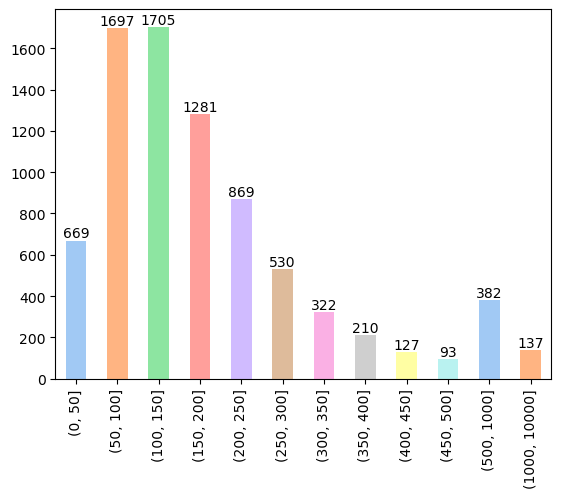

In [41]:
#bar plotof frequency distribution table
ax=pd.cut(chicagobnb.price,bins=[0,50,100,150,200,250,300,350,400,450,500,1000,10000]).value_counts().sort_index().plot(kind='bar',color=sns.color_palette('pastel'))
for i in ax.containers:
  ax.bar_label(i)

# Data Aggregation

In [42]:
# what is the average price of different room_type?
chicagobnb.price.groupby(chicagobnb.room_type).mean()

room_type
Entire home/apt    243.407999
Hotel room         187.729167
Private room       115.835600
Shared room         48.857143
Name: price, dtype: float64

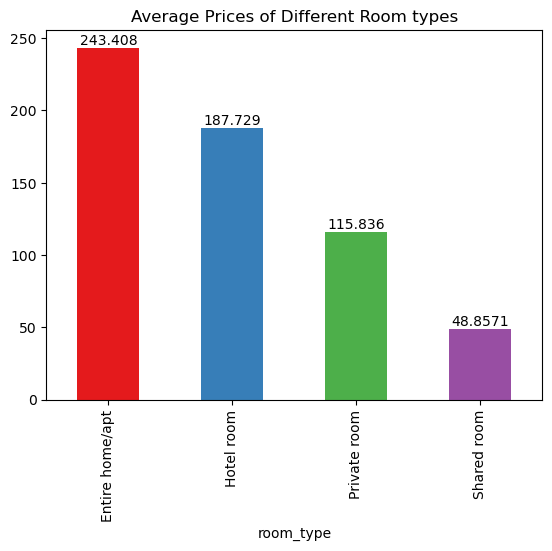

In [43]:
ax=chicagobnb.price.groupby(chicagobnb.room_type).mean().plot(kind='bar',color=sns.color_palette('Set1'),title='Average Prices of Different Room types')
for i in ax.containers:
    ax.bar_label(i)

In [44]:
# What is the Average price in different neighbourhood?
chicagobnb.price.groupby(chicagobnb.neighbourhood).mean().sort_values(ascending=False)

neighbourhood
Clearing           387.294118
Lincoln Park       311.731148
Near North Side    311.229167
West Town          301.153750
Loop               272.973558
                      ...    
East Side           72.166667
West Englewood      66.117647
Riverdale           66.000000
New City            65.523810
Mount Greenwood     62.000000
Name: price, Length: 77, dtype: float64

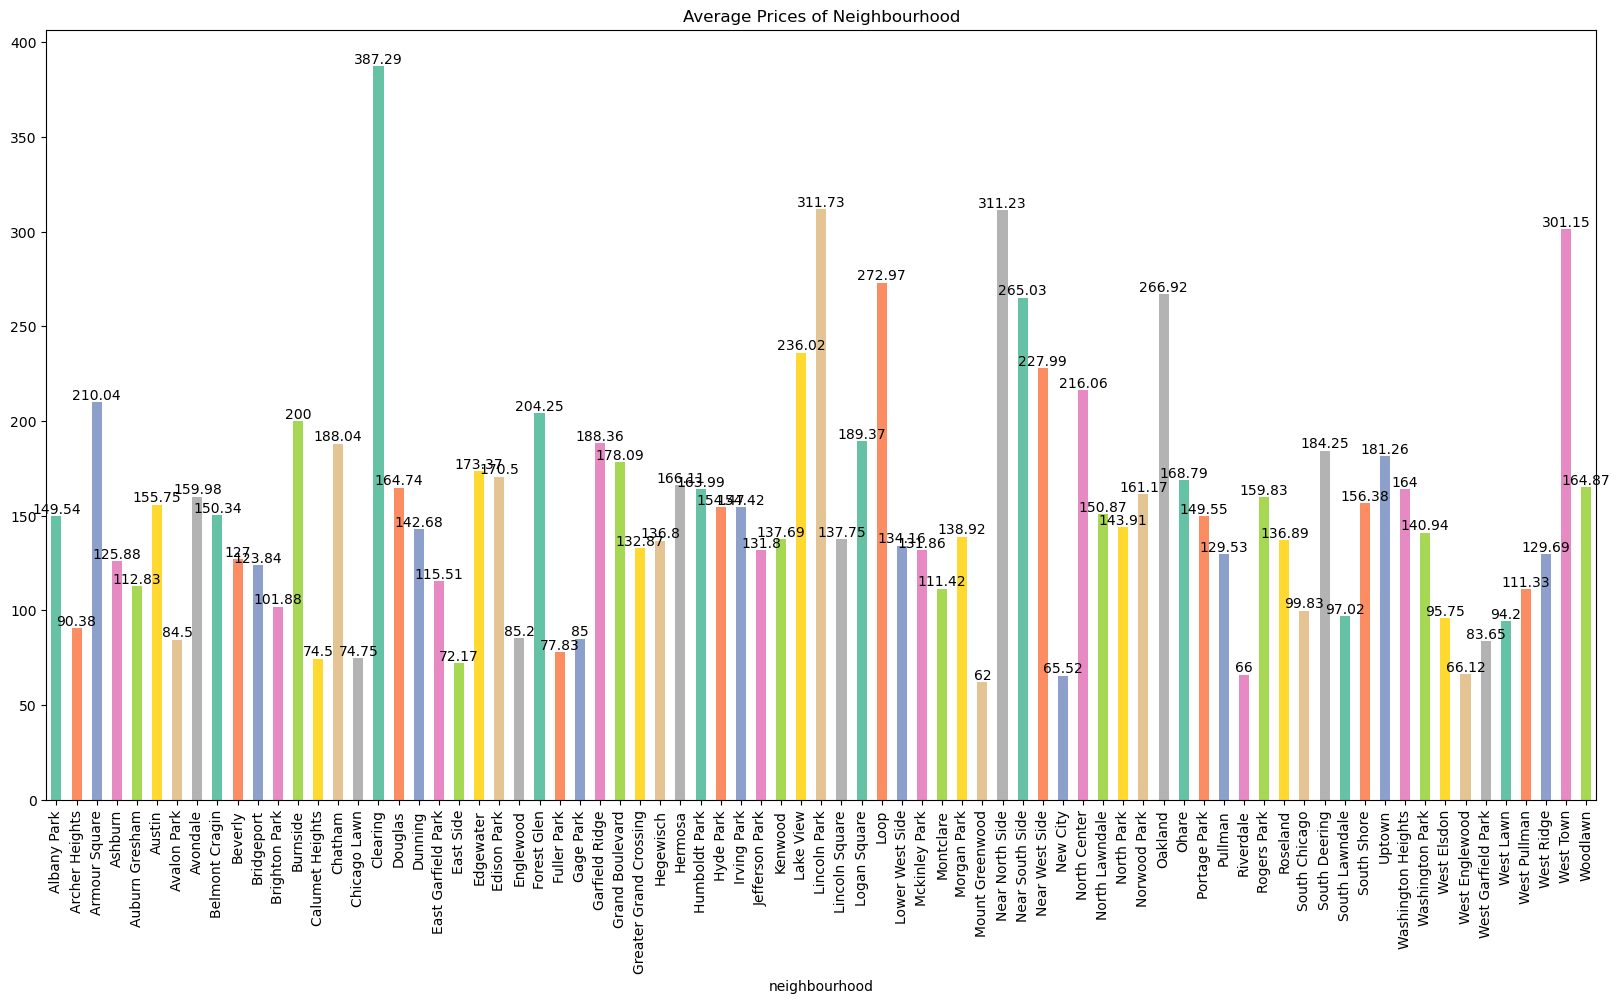

In [45]:
ax=np.round(chicagobnb.price.groupby(chicagobnb.neighbourhood).mean(),2).plot(kind='bar',figsize=(20,10),color=sns.color_palette('Set2'),title='Average Prices of Neighbourhood')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [46]:
# what is the median number_of_reviews for each neighborhood
chicagobnb.number_of_reviews.groupby(chicagobnb.neighbourhood).median().sort_values(ascending=False)

neighbourhood
Edison Park      165.5
Ashburn           63.0
North Center      42.0
North Park        40.0
Forest Glen       38.0
                 ...  
Loop               1.0
New City           1.0
Chatham            0.0
South Deering      0.0
Clearing           0.0
Name: number_of_reviews, Length: 77, dtype: float64

In [47]:
# what is the Average price based on neighborhood and room_type
pd.set_option('display.max_rows',174)
chicagobnb.price.groupby([chicagobnb.neighbourhood,chicagobnb.room_type]).mean()

neighbourhood           room_type      
Albany Park             Entire home/apt    187.142857
                        Private room        65.772727
Archer Heights          Entire home/apt     88.666667
                        Private room        95.500000
Armour Square           Entire home/apt    324.560976
                        Private room        58.580645
Ashburn                 Entire home/apt    125.875000
Auburn Gresham          Entire home/apt    164.846154
                        Private room        79.000000
                        Shared room         30.714286
Austin                  Entire home/apt    192.771429
                        Private room        74.750000
Avalon Park             Entire home/apt     84.500000
Avondale                Entire home/apt    172.301370
                        Private room        65.315789
Belmont Cragin          Entire home/apt    171.730769
                        Private room       107.090909
                        Shared room       

In [48]:
# cross tabulation - frequency table of 2 non numeric variables
pd.crosstab(chicagobnb.neighbourhood,chicagobnb.room_type).sort_values(by='Entire home/apt',ascending=False)

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Near North Side,786,24,148,2
West Town,668,17,114,1
Lake View,532,0,73,5
Near West Side,405,1,107,0
Logan Square,384,0,68,0
Loop,371,3,42,0
Lincoln Park,272,0,29,4
Near South Side,233,0,4,0
Lower West Side,168,0,73,2


In [49]:
pd.pivot_table(columns='room_type',values='price',index='neighbourhood',data=chicagobnb).sort_values(by='Entire home/apt',ascending=False)

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Clearing,409.500000,NaN,NaN,32.000000
Lincoln Park,337.378676,NaN,108.000000,44.750000
West Town,336.702096,253.705882,101.912281,75.000000
Armour Square,324.560976,NaN,58.580645,NaN
Near North Side,289.773537,100.416667,462.317568,92.500000
Oakland,286.636364,NaN,50.000000,NaN
Loop,281.258760,278.666667,199.380952,NaN
Edison Park,277.000000,NaN,64.000000,NaN
Near West Side,270.000000,0.000000,71.121495,NaN


# Hypothesis Testing
## Test Null Average Price of different room types

In [50]:
chicagobnb.price.groupby(chicagobnb.room_type).mean()

room_type
Entire home/apt    243.407999
Hotel room         187.729167
Private room       115.835600
Shared room         48.857143
Name: price, dtype: float64

In [51]:
#Null:There is no significante difference between average price for different rooms
#Alternate:There is a significante difference between average price for different rooms

In [52]:
entire_home_apt=chicagobnb[chicagobnb.room_type=='Entire home/apt']
hotel=chicagobnb[chicagobnb.room_type=="Hotel room"]
private=chicagobnb[chicagobnb.room_type=="Private room"]
shared=chicagobnb[chicagobnb.room_type=="Shared room"]

In [53]:
from scipy.stats import f_oneway

In [54]:
f_oneway(entire_home_apt.price,hotel.price,private.price,shared.price)
# since pvalue=2.5550788965214003e-32 is lessthan 0.05, we reject null hypothesis
# we may conclude that there is a significante difference between average price for different rooms

F_onewayResult(statistic=97.83901785242429, pvalue=3.401455772108254e-62)

## Test Null no association between room_type and neighbourhood

In [55]:
pd.crosstab(chicagobnb.room_type,chicagobnb.neighbourhood)

neighbourhood,Albany Park,Archer Heights,Armour Square,Ashburn,Auburn Gresham,Austin,Avalon Park,Avondale,Belmont Cragin,Beverly,...,Washington Heights,Washington Park,West Elsdon,West Englewood,West Garfield Park,West Lawn,West Pullman,West Ridge,West Town,Woodlawn
room_type,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,49,6,41,8,13,35,2,146,26,8,...,7,32,3,3,10,8,3,67,668,83
Hotel room,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,17,0
Private room,22,2,31,0,3,16,0,19,11,6,...,0,19,1,11,13,2,3,20,114,39
Shared room,0,0,0,0,7,0,0,0,1,0,...,0,1,0,3,0,0,0,12,1,0


In [56]:
from scipy.stats import chi2_contingency

In [57]:
chi2_contingency(pd.crosstab(chicagobnb.room_type,chicagobnb.neighbourhood))
# since pvalue=
# we may conclude that there is no association difference between room_type and neighbourhood

Chi2ContingencyResult(statistic=2464.2409676116267, pvalue=0.0, dof=228, expected_freq=array([[5.48692672e+01, 6.18245264e+00, 5.56420738e+01, 6.18245264e+00,
        1.77745513e+01, 3.94131356e+01, 1.54561316e+00, 1.27513086e+02,
        2.93666500e+01, 1.08192921e+01, 1.33695538e+02, 2.00929711e+01,
        7.72806580e-01, 2.47298106e+01, 2.00929711e+01, 3.09122632e+00,
        1.31377119e+01, 6.18245264e+01, 3.16850698e+01, 1.17466600e+02,
        9.27367896e+00, 1.51470090e+02, 1.54561316e+00, 2.70482303e+01,
        6.18245264e+00, 4.63683948e+00, 3.09122632e+00, 8.50087238e+00,
        9.50552094e+01, 4.17315553e+01, 3.86403290e+00, 2.08657777e+01,
        7.49622383e+01, 7.80534646e+01, 1.36786765e+02, 4.17315553e+01,
        4.17315553e+01, 4.71412014e+02, 2.35706007e+02, 8.11446909e+01,
        3.49308574e+02, 3.21487537e+02, 1.87791999e+02, 3.86403290e+01,
        9.27367896e+00, 1.00464855e+01, 1.54561316e+00, 7.41894317e+02,
        1.83155160e+02, 3.96449776e+02, 3.2457876

# Splitting the data into nimcols and objcols from the data

In [58]:
numcols=chicagobnb.select_dtypes(include=np.number)
objcols=chicagobnb.select_dtypes(include=["object"])

In [59]:
numcols.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,2384,2613,41.78790,-87.58780,129,3,220,2.14,1,350,19
1,7126,17928,41.90166,-87.68021,94,32,493,2.90,1,295,44
2,2907500,11231030,41.78225,-87.72806,39,1,335,3.11,2,196,6
3,755701,3920450,41.93115,-87.71836,100,32,27,0.22,4,198,3
4,10945,33004,41.91196,-87.63981,219,4,66,0.59,7,94,19


In [60]:
objcols.head()

,name,host_name,neighbourhood,room_type,license
0,Condo in Chicago · ★4.99 · 1 bedroom · 1 bed ·...,Rebecca,Hyde Park,Private room,City registration pending
1,Rental unit in Chicago · ★4.70 · 1 bedroom · 1...,Sarah,West Town,Entire home/apt,R21000075737
2,Home in Chicago · ★4.84 · 1 bedroom · 1 bed · ...,Erik,West Lawn,Private room,R21000075737
3,Rental unit in Chicago · ★4.73 · 3 bedrooms · ...,Vas,Logan Square,Entire home/apt,City registration pending
4,Rental unit in Chicago · ★4.64 · 2 bedrooms · ...,At Home Inn,Lincoln Park,Entire home/apt,2209984


In [61]:
# Dropping unwanted columns from numcols and objcols too
numcols=numcols.drop(['id','host_id','latitude','longitude'],axis=1)

In [62]:
numcols.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,129,3,220,2.14,1,350,19
1,94,32,493,2.90,1,295,44
2,39,1,335,3.11,2,196,6
3,100,32,27,0.22,4,198,3
4,219,4,66,0.59,7,94,19


In [63]:
# we need to drop price column because it dependent variable
numcols=numcols.drop('price',axis=1)

In [64]:
objcols=objcols.drop(['name','host_name','license'],axis=1)

In [65]:
objcols.head()

,neighbourhood,room_type
0,Hyde Park,Private room
1,West Town,Entire home/apt
2,West Lawn,Private room
3,Logan Square,Entire home/apt
4,Lincoln Park,Entire home/apt


In [66]:
numcols.corr()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
minimum_nights,1.000000,-0.107861,-0.147210,0.116434,-0.005308,-0.174742
number_of_reviews,-0.107861,1.000000,0.609102,-0.163502,-0.060506,0.725671
reviews_per_month,-0.147210,0.609102,1.000000,-0.086405,0.012450,0.783660
calculated_host_listings_count,0.116434,-0.163502,-0.086405,1.000000,0.134967,-0.188501
availability_365,-0.005308,-0.060506,0.012450,0.134967,1.000000,-0.017787
number_of_reviews_ltm,-0.174742,0.725671,0.783660,-0.188501,-0.017787,1.000000


<Axes: >

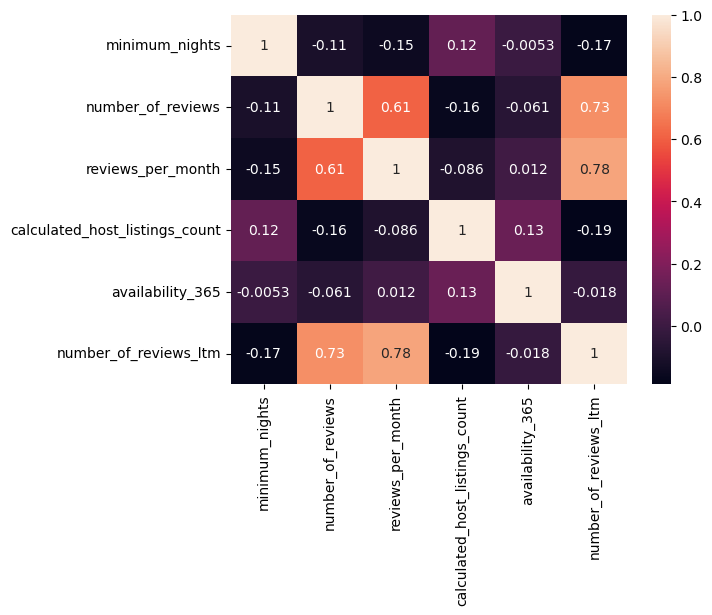

In [67]:
sns.heatmap(numcols.corr(),annot=True)

# Scaling the numcols with standard scaler

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
sc=StandardScaler()

In [70]:
numcols_scale=sc.fit_transform(numcols)

In [71]:
numcols_scale=pd.DataFrame(numcols_scale,columns=numcols.columns)

In [72]:
numcols_scale.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,-0.293151,1.984523,0.155645,-0.341431,1.182104,0.262342
1,0.381518,5.100282,0.608471,-0.341431,0.742904,1.437708
2,-0.339680,3.297022,0.733594,-0.335795,-0.047657,-0.348848
3,0.381518,-0.218193,-0.988337,-0.324522,-0.031686,-0.489892
4,-0.269887,0.226915,-0.767883,-0.307612,-0.862174,0.262342


<Axes: >

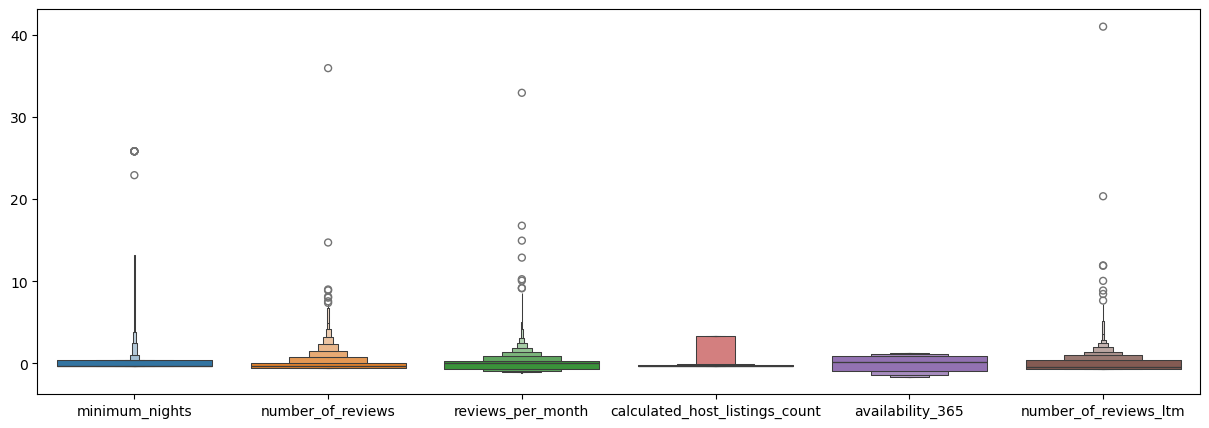

In [73]:
plt.figure(figsize=(15,5))
sns.boxenplot(numcols_scale)

# Scaling the numcols with MinMax Scaler

In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
mm=MinMaxScaler()

In [76]:
numcols_mm=mm.fit_transform(numcols)

In [77]:
numcols_mm=pd.DataFrame(numcols_mm,columns=numcols.columns)

In [78]:
numcols_mm.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0.001779,0.068879,0.037283,0.000000,0.958904,0.021469
1,0.027580,0.154352,0.050586,0.000000,0.808219,0.049718
2,0.000000,0.104884,0.054262,0.001529,0.536986,0.006780
3,0.027580,0.008453,0.003676,0.004587,0.542466,0.003390
4,0.002669,0.020664,0.010152,0.009174,0.257534,0.021469


<Axes: >

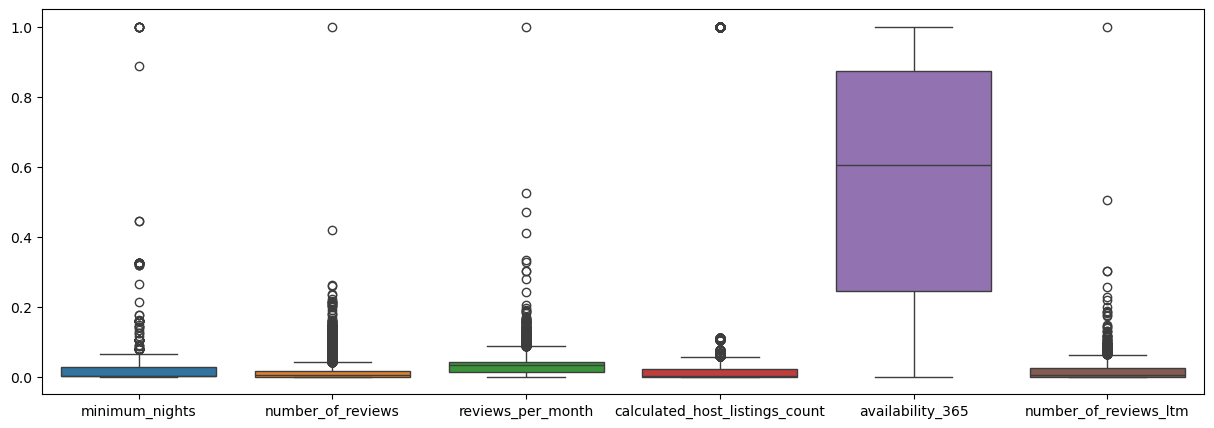

In [79]:
plt.figure(figsize=(15,5))
sns.boxplot(numcols_mm)

# Scaling the numcols with Robust Scaler

In [80]:
from sklearn.preprocessing import RobustScaler

In [81]:
robust=RobustScaler()

In [82]:
numcols_robust=robust.fit_transform(numcols)

In [83]:
numcols_robust=pd.DataFrame(numcols_robust,columns=numcols.columns)

In [84]:
numcols_robust.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0.033333,3.961538,0.156423,-0.133333,0.560870,0.636364
1,1.000000,9.211538,0.611513,-0.133333,0.321739,1.772727
2,-0.033333,6.173077,0.737261,-0.066667,-0.108696,0.045455
3,1.000000,0.250000,-0.993278,0.066667,-0.100000,-0.090909
4,0.066667,1.000000,-0.771721,0.266667,-0.552174,0.636364


<Axes: >

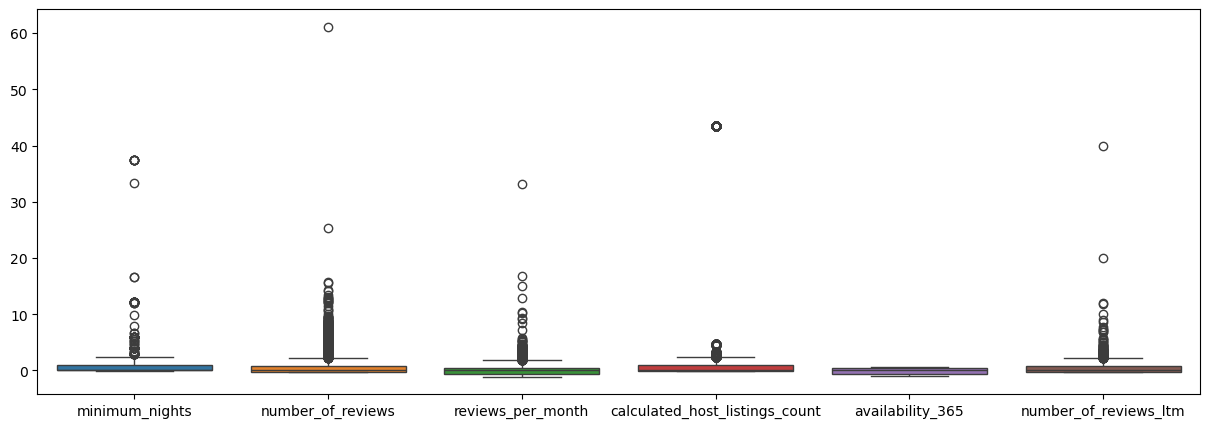

In [85]:
plt.figure(figsize=(15,5))
sns.boxplot(numcols_robust)

# Label Encoding for objcols

In [86]:
from sklearn.preprocessing import LabelEncoder

In [87]:
objcols_en=objcols.apply(LabelEncoder().fit_transform)

In [88]:
objcols_en.head()

,neighbourhood,room_type
0,33,2
1,75,0
2,72,2
3,40,0
4,38,0


# Concatinating the numcols and objcols

In [89]:
combinedf=pd.concat([numcols_mm,objcols_en],axis=1)

In [90]:
combinedf.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood,room_type
0,0.001779,0.068879,0.037283,0.000000,0.958904,0.021469,33,2
1,0.027580,0.154352,0.050586,0.000000,0.808219,0.049718,75,0
2,0.000000,0.104884,0.054262,0.001529,0.536986,0.006780,72,2
3,0.027580,0.008453,0.003676,0.004587,0.542466,0.003390,40,0
4,0.002669,0.020664,0.010152,0.009174,0.257534,0.021469,38,0


In [91]:
combinedf.tail()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood,room_type
8019,0.00000,0.0,0.032711,0.033639,0.972603,0.0,21,2
8020,0.00000,0.0,0.032711,0.033639,0.994521,0.0,66,0
8021,0.00000,0.0,0.032711,0.033639,0.983562,0.0,66,0
8022,0.02758,0.0,0.032711,0.007645,0.991781,0.0,7,0
8023,0.00000,0.0,0.032711,0.001529,0.106849,0.0,49,0


In [92]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8024 entries, 0 to 8023
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   minimum_nights                  8024 non-null   float64
 1   number_of_reviews               8024 non-null   float64
 2   reviews_per_month               8024 non-null   float64
 3   calculated_host_listings_count  8024 non-null   float64
 4   availability_365                8024 non-null   float64
 5   number_of_reviews_ltm           8024 non-null   float64
 6   neighbourhood                   8024 non-null   int32  
 7   room_type                       8024 non-null   int32  
dtypes: float64(6), int32(2)
memory usage: 438.9 KB


In [93]:
print('skewness:',chicagobnb.price.skew())
print('kurtosis:',chicagobnb.price.kurt())

skewness: 10.65655860989696
kurtosis: 227.35572764182928


<Axes: ylabel='Frequency'>

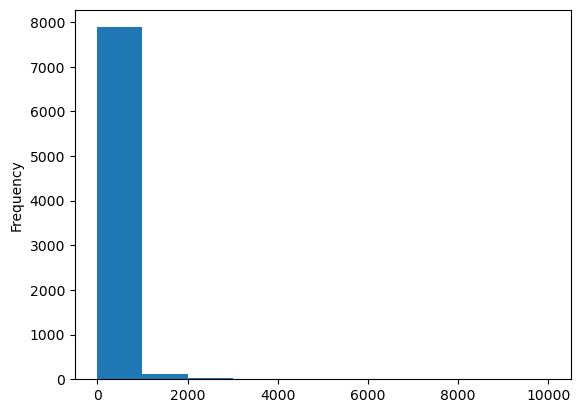

In [94]:
chicagobnb.price.plot(kind='hist') #high skewness and high kurtosis

<Axes: >

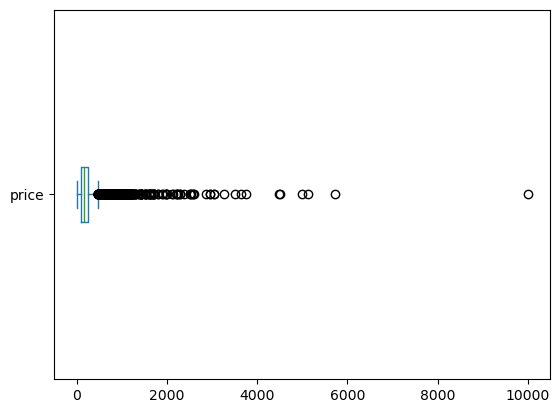

In [95]:
chicagobnb.price.plot(kind='box',vert=False)

<Axes: ylabel='Density'>

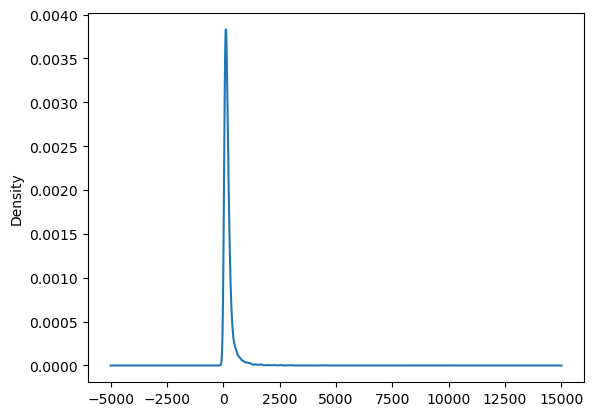

In [96]:
chicagobnb.price.plot(kind='density')

<Figure size 3000x1500 with 0 Axes>

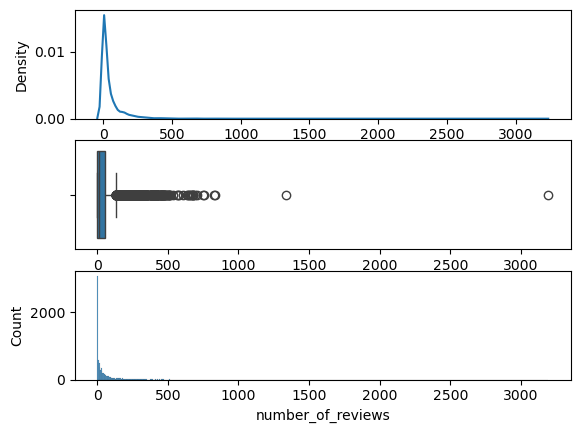

In [97]:
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.kdeplot(chicagobnb.number_of_reviews,ax=ax[0])
sns.boxplot(chicagobnb.number_of_reviews,orient='h',ax=ax[1])
sns.histplot(chicagobnb.number_of_reviews,ax=ax[2])
plt.show()

<Figure size 3000x1500 with 0 Axes>

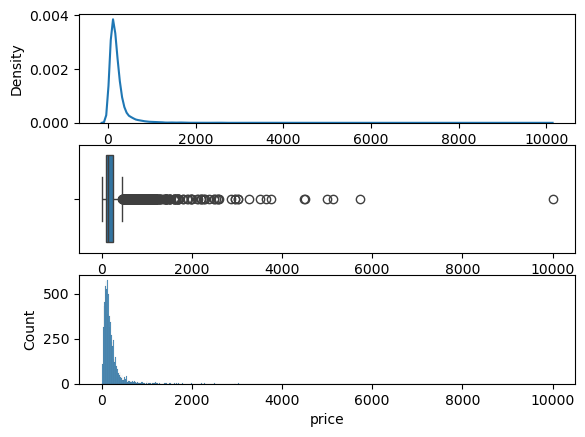

In [98]:
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.kdeplot(chicagobnb.price,ax=ax[0])
sns.boxplot(chicagobnb.price,orient='h',ax=ax[1])
sns.histplot(chicagobnb.price,ax=ax[2])
plt.show()

# Splitting into Independent(X's) and Dependent Variable(y)

In [99]:
X=combinedf
y=chicagobnb.price

In [100]:
X.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood,room_type
0,0.001779,0.068879,0.037283,0.000000,0.958904,0.021469,33,2
1,0.027580,0.154352,0.050586,0.000000,0.808219,0.049718,75,0
2,0.000000,0.104884,0.054262,0.001529,0.536986,0.006780,72,2
3,0.027580,0.008453,0.003676,0.004587,0.542466,0.003390,40,0
4,0.002669,0.020664,0.010152,0.009174,0.257534,0.021469,38,0


In [101]:
y.head()

0    129
1     94
2     39
3    100
4    219
Name: price, dtype: int64

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 3000x1500 with 0 Axes>

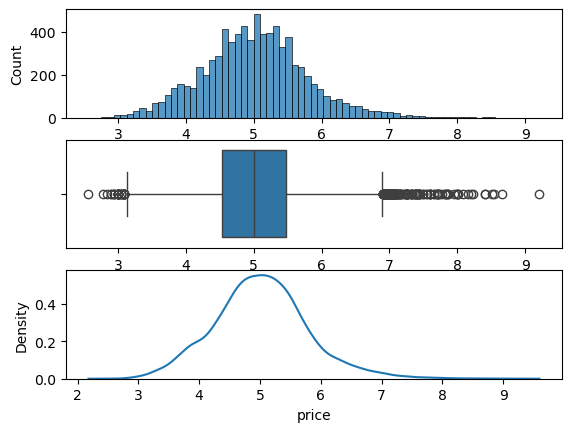

In [102]:
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.histplot(np.log(y),ax=ax[0])
sns.boxplot(np.log(y),orient='h',ax=ax[1])
sns.kdeplot(np.log(y),ax=ax[2])
plt.show()

# Model Building
## Linear Regression

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
reg=LinearRegression()

In [105]:
regmodel=reg.fit(X,y)

In [106]:
regmodel.score(X,y)

0.054142684472365366

In [107]:
from sklearn.model_selection import cross_val_score

In [108]:
cross_val_score(reg,X,y)

array([ 0.0406233 ,  0.06175618,  0.04607165,  0.05208873, -0.00285783])

In [109]:
np.mean([ 0.0406233 ,  0.06175618,  0.04607165,  0.05208873, -0.00285783])

0.039536405999999996

In [110]:
regpredict=regmodel.predict(X)

In [111]:
regresidual=y-regpredict

In [112]:
np.sqrt(np.mean(regresidual**2))# RMSE

282.96411153949225

# Log Transformation

In [113]:
regmodel_2=reg.fit(X,np.log1p(y))

In [114]:
regmodel_2.score(X,np.log1p(y))

0.26706320437709885

In [115]:
regpredict_2=regmodel_2.predict(X)

In [116]:
regresidual_2=y-regpredict_2

In [117]:
np.sqrt(np.mean(regresidual_2**2))# RMSE

358.24056592811155

# Decision Tree

In [118]:
from sklearn.tree import DecisionTreeRegressor

In [119]:
tree=DecisionTreeRegressor(max_depth=12,)

In [120]:
treemodel=tree.fit(X,y)

In [121]:
treemodel.score(X,y)

0.7488273734535571

In [122]:
cross_val_score(tree,X,y)

array([-0.07679149,  0.09064631, -0.62580809, -0.04573714, -0.3996566 ])

In [123]:
np.mean([-0.07127478, -0.11151914, -0.632996  , -0.01178558, -0.39754153])

-0.245023406

In [124]:
tree_predict=tree.predict(X)

In [125]:
tree_residual=y-tree_predict

In [126]:
np.sqrt(np.mean(tree_residual**2))

145.81583771705053

# Random Forest

In [127]:
from sklearn.ensemble import RandomForestRegressor

In [128]:
rf=RandomForestRegressor()

In [129]:
rf_model=rf.fit(X,y)

In [130]:
rf_model.score(X,y)

0.8928927146197789

In [131]:
cross_val_score(rf,X,y)

array([ 0.0429731 ,  0.31142695,  0.1916946 ,  0.18709866, -0.05109754])

In [132]:
np.mean([ 0.04047124,  0.29954378,  0.17801169,  0.1931282 , -0.09701368])

0.122828246

In [133]:
rf_predict=rf.predict(X)

In [134]:
rf_residual=y-rf_predict

In [135]:
np.sqrt(np.mean(rf_residual**2))

95.21997209017286

# Gradient Boosting Machine(GBM)

In [136]:
from sklearn.ensemble import GradientBoostingRegressor

In [137]:
gbr=GradientBoostingRegressor(max_depth=8,n_estimators=100)

In [138]:
gbrmodel=gbr.fit(X,y)

In [139]:
gbrmodel.score(X,y)

0.901232430761006

In [140]:
cross_val_score(gbr,X,y)

array([-0.00242571,  0.27522176,  0.0906235 ,  0.1824704 , -0.02634649])

In [141]:
np.mean([-0.0094848 ,  0.28288666,  0.11822646,  0.18028552, -0.04682088])

0.10501859200000001

In [142]:
gbr_predict=gbr.predict(X)

In [143]:
gbr_residual=y-gbr_predict

In [144]:
np.sqrt(np.mean(gbr_residual**2))

91.43779117507144

# Support Vector Machine(SVM)

In [145]:
from sklearn.svm import SVR

In [146]:
svr=SVR(max_iter=1000)

In [147]:
svrmodel=svr.fit(X,y)

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [148]:
svrmodel.score(X,y)

-0.014598897838655978

In [149]:
cross_val_score(svr,X,y)

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: 

array([-0.00335635, -0.02303323, -0.04421605, -0.05936181, -0.07040849])

In [150]:
np.mean([-15.48517806, -26.20425982, -48.53118848, -15.66336973,-9.88577391])

-23.153954

In [151]:
svr_predict=svr.predict(X)

In [152]:
svr_residual=y-svr_predict

In [153]:
np.sqrt(np.mean(svr_residual**2))

293.0662024598513

# LinearSVR

In [154]:
from sklearn.svm import LinearSVR

In [155]:
lsvr=LinearSVR(C=2,max_iter=1000,fit_intercept=False)

In [156]:
lsvrmodel=lsvr.fit(X,y)

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [157]:
lsvrmodel.score(X,y)

-0.031564427685971896

In [158]:
cross_val_score(lsvr,X,y)

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` i

array([-0.00743475, -0.00376296, -0.09180907, -0.04921159, -0.06919922])

In [159]:
np.mean([ 0.02350321,  0.00934578, -0.0152108 , -0.025637  , -0.07479451])

-0.016558663999999997

In [160]:
lsvr_predict=lsvr.predict(X)

In [161]:
lsvr_residual=y-lsvr_predict

In [162]:
np.sqrt(np.mean(lsvr_residual**2))

295.5062852249939

# KNearestNeighbour(KNN)

In [163]:
from sklearn.neighbors import KNeighborsRegressor

In [164]:
knr=KNeighborsRegressor(n_neighbors=2)

In [165]:
knrmodel=knr.fit(X,y)

In [166]:
knrmodel.score(X,y)

0.7293936750348167

In [167]:
cross_val_score(knr,X,y)

array([-0.0177921 , -0.18656217, -0.28877543, -0.2051781 , -0.29686932])

In [168]:
np.mean([-0.0177921 , -0.18656217, -0.28877543, -0.2051781 , -0.29686932])

-0.19903542400000002

In [169]:
knr_predict=knr.predict(X)

In [170]:
knr_residual=y-knr_predict

In [171]:
np.sqrt(np.mean(knr_residual**2))

151.35177386767333

# Summary:
After building and evaluating various machine learning models for the House Prices dataset, we have compiled additional information, including RMSE(Root Mean Square Error), to provide a comprehensive summary. Below is a table summarizing the models, their machine learning scores, r_square, and RMSE values:

| Model Name | R_square | RMSE |
|:--:|:--:|:--:|
| Linear Regression | 0.054142684472365366 | 282.96411153949225 |
| Decision Tree | 0.7488273734535571 | 145.81583771705053 |
| Random Forest | 0.8974436509413325 | 93.17508971774802 |
| **Gradient Boosting Machine** | **0.9012324307610059** | **91.43779117507144** |
| Support Vector Machine | -0.014598897838655978 | 293.0662024598513 |
| LinearSVR |-0.03629216939692448| 296.1826755121886 |
| k-nearest neighbors | 0.7293936750348167 | 151.35177386767333 |

The "Gradient Boosting Machine" model has a significantly lower RMSE score than its counterparts, indicating its superior predictive performance for this dataset. The lower RMSE value suggests that the Gradient Boosting Machine model yields predictions more closely aligned with actual outcomes, which is particularly valuable for regression tasks where numerical prediction accuracy is crucial.

In light of these findings, it's advisable to consider the Gradient Boosting Machine model as a more reliable option for regression analysis on the Chicago Airbnb dataset, prioritizing RMSE as the key performance indicator score.